In [6]:
# Imports - exercise 9
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform


from skimage import io
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from skimage.transform import SimilarityTransform
from skimage.transform import warp
import os
import pathlib

from auxiliaryFuns import *

import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from IPython.display import clear_output

from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.color import label2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance

import pandas as pd
import seaborn as sns


In [7]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

In [8]:
# Question 1
in_dir = "data-exam/"

ct = dicom.read_file(in_dir + '1-162.dcm')
img = ct.pixel_array
print(img.shape)
print(img.dtype)

back_roi = io.imread(in_dir + 'BackRoi.png')
back_mask = back_roi > 0
back_values = img[back_mask]

liver_roi = io.imread(in_dir + 'LiverROI.png')
liver_mask = liver_roi > 0
liver_values = img[liver_mask]

kidney_roi = io.imread(in_dir + 'KidneyRoi.png')
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]

aorta_roi = io.imread(in_dir + 'AortaRoi.png')
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]




(512, 512)
int16


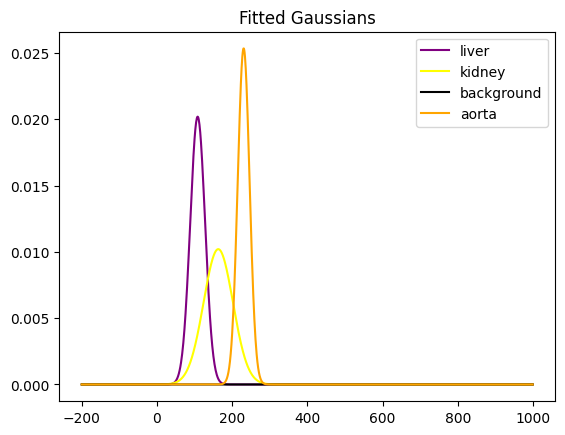

In [9]:
# Hounsfield unit limits of the plot
min_hu = -200
max_hu = 1000
hu_range = np.arange(min_hu, max_hu, 1.0)

# Calculate mean and standard deviation for kidney, background, and aorta values
std_kidney = np.std(kidney_values)
mu_kidney = np.mean(kidney_values)

std_background = np.std(back_values)
mu_background = np.mean(back_values)

std_aorta = np.std(aorta_values)
mu_aorta = np.mean(aorta_values)

std_liver = np.std(liver_values)
mu_liver = np.mean(liver_values)

# Calculate PDFs
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)
pdf_kidney = norm.pdf(hu_range, mu_kidney, std_kidney)
pdf_background = norm.pdf(hu_range, mu_background, std_background)
pdf_aorta = norm.pdf(hu_range, mu_aorta, std_aorta)

# Plot PDFs
plt.plot(hu_range, pdf_liver, 'purple', label="liver")
plt.plot(hu_range, pdf_kidney, 'yellow', label="kidney")
plt.plot(hu_range, pdf_background, 'black', label="background")
plt.plot(hu_range, pdf_aorta, 'orange', label="aorta")

# Set plot title and legend
plt.title("Fitted Gaussians")
plt.legend()

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == "":


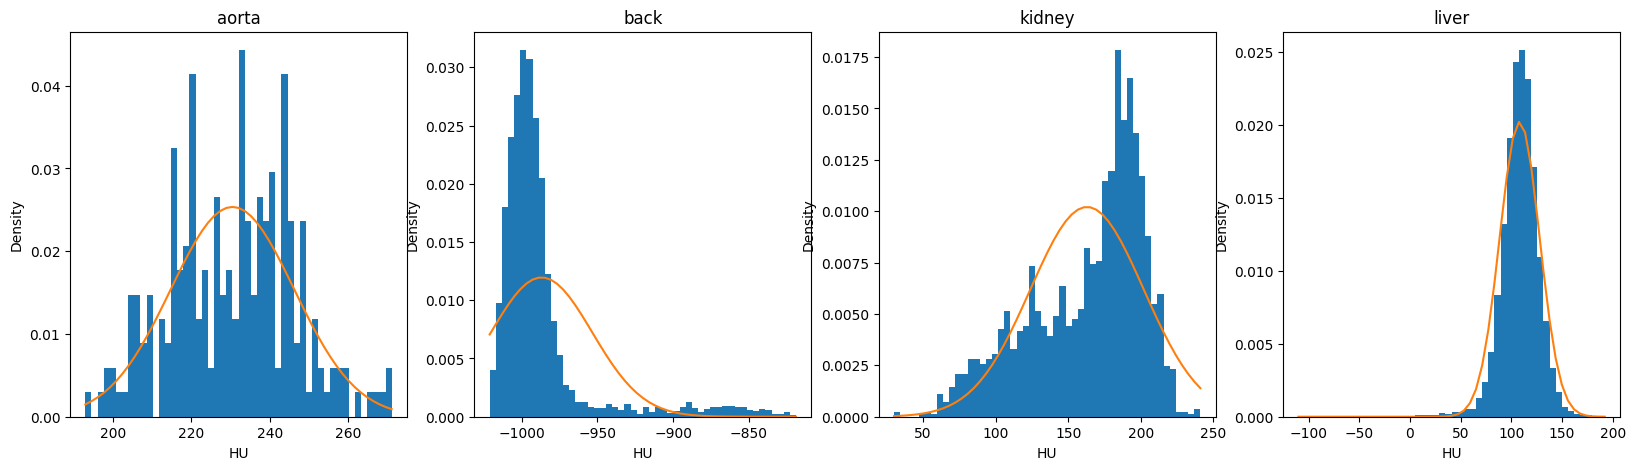

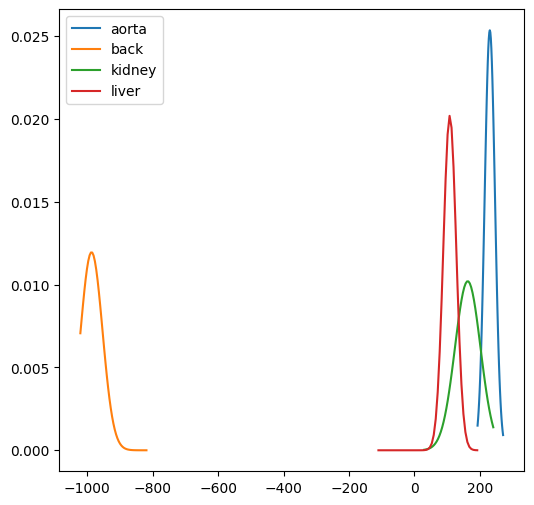

In [10]:
aorta_mask, back_mask, kidney_mask, liver_mask = aorta_roi > 0, back_roi > 0, kidney_roi > 0, liver_roi > 0
aorta_values, back_values, kidney_values, liver_values = img[aorta_mask], img[back_mask], img[kidney_mask], img[liver_mask]

# compute mean and std 
mu_aorta, mu_back, mu_kidney, mu_liver = np.mean(aorta_values), np.mean(back_values), np.mean(kidney_values), np.mean(liver_values)
std_aorta, std_back, std_kidney, std_liver = np.std(aorta_values), np.std(back_values), np.std(kidney_values), np.std(liver_values)

# gather in array for easy plotting 
means = np.array([mu_aorta, mu_back, mu_kidney, mu_liver])
stds = np.array([std_aorta, std_back, std_kidney, std_liver])
titles = np.array(["aorta", "back", "kidney", "liver"])
values = np.array([aorta_values, back_values, kidney_values, liver_values])
ns, bins, patches = [], [], []
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
for i in range(4): 
    n, bin, patch = ax[i].hist(values[i].ravel(), bins = 50, density=True)
    ns.append(n), bins.append(bin), patches.append(patch)
    ax[i].plot(bin, norm.pdf(bin, means[i], stds[i]))
    ax[i].set_xlabel("HU")
    ax[i].set_ylabel("Density")
    ax[i].set_title(titles[i])
plt.show()

plt.figure(figsize = (6, 6))
for i in range(len(bins)): 
    plt.plot(bins[i], norm.pdf(bins[i], means[i], stds[i]), label = titles[i])
plt.legend()
plt.show()

135.53619417264818 196.7035801627044


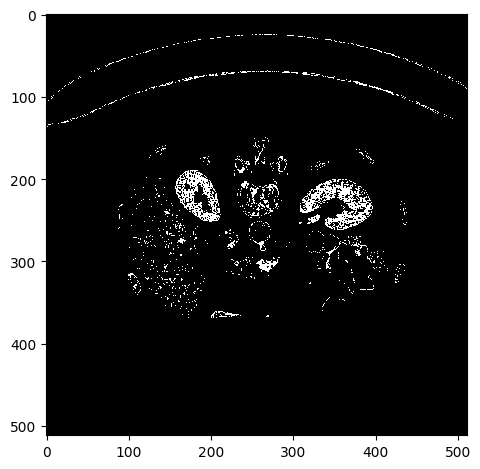

In [11]:
# compute thresholds 
t_background = -200
t_liver_kidney = (mu_liver + mu_kidney) / 2.0
t_kidney_aorta = (mu_kidney + mu_aorta) / 2.0 

print(t_liver_kidney, t_kidney_aorta)

# compute bimary images 
background_img = img <= t_background 
segment_img = (img > t_liver_kidney) & (img < t_kidney_aorta)

io.imshow(segment_img)
io.show()


In [12]:
gt_1 = (io.imread(in_dir + 'KidneyRoi.png') > 0)

score1 = 1 - distance.dice(segment_img.ravel(), gt_1.ravel())
print(score1)

0.24143337066069426


In [13]:
# Part 1 answers
# Q1 135.5, 196.7
# Q2 0.241

In [14]:
import numpy as np
import math

# Define the (x, y) coordinates of the point
x = 7
y = 13

# Convert (x, y) to (rho, theta) using Hough transform equations
theta = math.degrees(math.atan2(y, x))
rho = x * math.cos(math.radians(theta)) + y * math.sin(math.radians(theta))

# Print the resulting (rho, theta) values
print("Point in Hough space:")
print("rho:", rho)
print("theta:", theta)

x = 3
y = 6

# Convert (x, y) to (rho, theta) using Hough transform equations
theta = math.degrees(math.atan2(y, x))
rho = x * math.cos(math.radians(theta)) + y * math.sin(math.radians(theta))

# Print the resulting (rho, theta) values
print("Point in Hough space:")
print("rho:", rho)
print("theta:", theta)



Point in Hough space:
rho: 14.7648230602334
theta: 61.69924423399363
Point in Hough space:
rho: 6.708203932499369
theta: 63.43494882292201


In [15]:
# Answer is
# 7, 13 and 3, 6

In [16]:
matrix = np.array([[64, 94, 21, 19, 31],
                   [38, 88, 30, 23, 92],
                   [81, 55, 47, 17, 43],
                   [53, 62, 23, 23, 18],
                   [35, 59, 84, 44, 90]])

rows, cols = matrix.shape

accumulator = np.zeros((rows, cols))
accumulator[0, :] = matrix[0, :]

for i in range(1, rows):
    for j in range(cols):
        min_prev = accumulator[i-1, j]
        if j > 0:
            min_prev = min(min_prev, accumulator[i-1, j-1])
        if j < cols-1:
            min_prev = min(min_prev, accumulator[i-1, j+1])
        accumulator[i, j] = matrix[i, j] + min_prev

print("Accumulator Image:")
print(accumulator)

Accumulator Image:
[[ 64.  94.  21.  19.  31.]
 [102. 109.  49.  42. 111.]
 [183. 104.  89.  59.  85.]
 [157. 151.  82.  82.  77.]
 [186. 141. 166. 121. 167.]]


In [17]:
# Answer is 121

In [18]:
haar = 178+60+155+252 - 168-217-159-223 - 97-136-32-108
print(haar)

# Answer is -495

-495


In [19]:
print(107+81 + 110 +120+220+53+200+33+12)
# Answer is 936

936


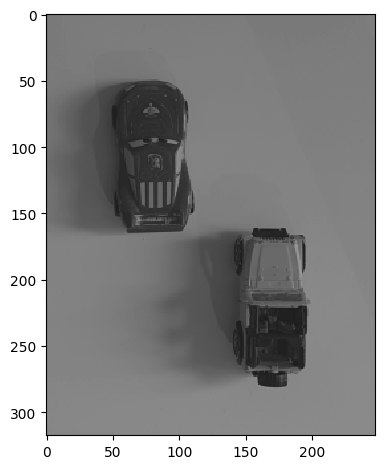

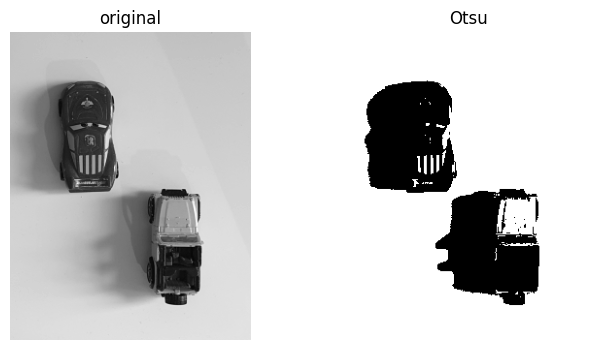

In [20]:
input_img = io.imread(in_dir + "pixelwise.png", as_gray=True)

# Calculate the current minimum and maximum values
min_val = input_img.min()
max_val = input_img.max()



# linear_transformed_image = (desired_max - desired_min) * (image - min_val) / (max_val - min_val) + desired_min


# Apply linear grayscale transformation
linear_transformed_image = (0.5 * (input_img - min_val) / (max_val - min_val)) + 0.1

io.imshow(linear_transformed_image)
io.show()

threshold = threshold_otsu(linear_transformed_image)
bin_img = (linear_transformed_image > threshold)*1

plot_comparison(linear_transformed_image, bin_img, "Otsu")




In [21]:
# Answer is the image and 0.37
print(threshold)

0.3724609375


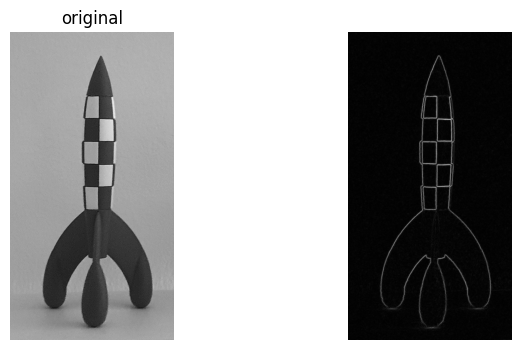

8885.0


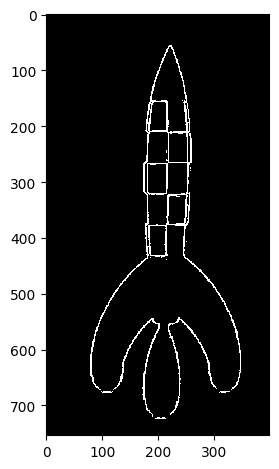

In [22]:
input_img = io.imread(in_dir + "rocket.png", as_gray=True)

proc = prewitt(img_as_ubyte(input_img))

plot_comparison(input_img, proc, "")

thres = proc > 0.06
thres_im = img_as_ubyte(thres)

print(np.sum(thres_im/255))

# Display the binary image
io.imshow(thres_im, cmap='gray')
io.show()

In [23]:
# Answer is 8885

41.233333333333334


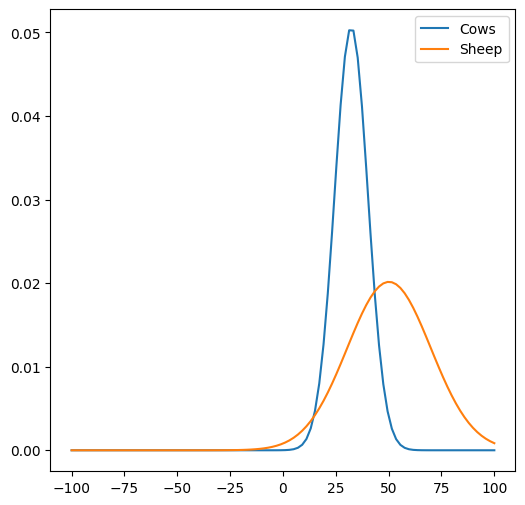

0.03898570495862376
0.016687527843330045


In [24]:
Cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]
Sheep = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

mu_cow = np.mean(Cows)
std_cow = np.std(Cows)
mu_sheep = np.mean(Sheep)
std_sheep = np.std(Sheep)

t_cow_sheep = (mu_cow + mu_sheep) / 2.0 
print(t_cow_sheep)


means = np.array([mu_cow, mu_sheep])
stds = np.array([std_cow, std_sheep])
titles = np.array(["Cows", "Sheep"])
x = np.linspace(-100, 100, 100)
plt.figure(figsize = (6, 6))
for i in range(2): 
    plt.plot(x, norm.pdf(x, means[i], stds[i]), label = titles[i])
plt.legend()
plt.show()

print(norm.pdf(38, mu_cow, std_cow))
print(norm.pdf(38, mu_sheep, std_sheep))


# 0.04 and 0.02

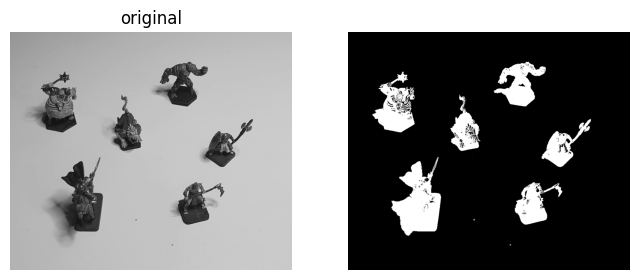

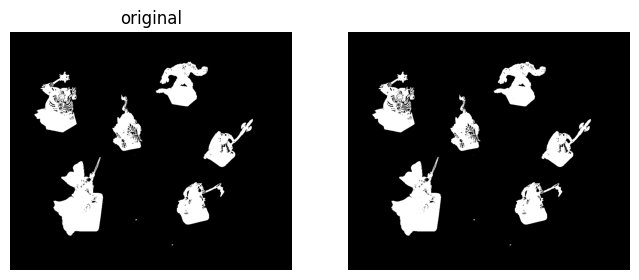

Number of labels: 31


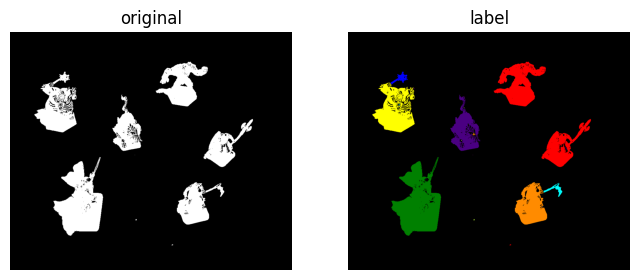

3


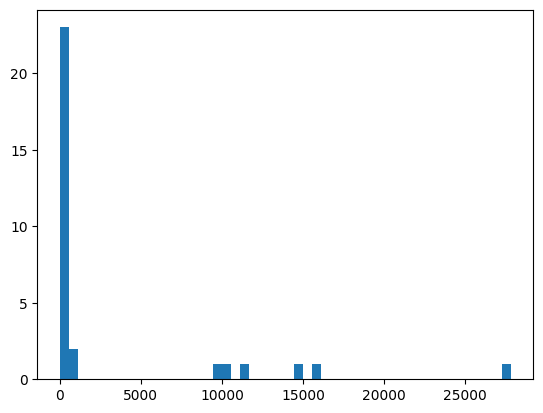

In [25]:
# Finding mini figures
figures = io.imread(in_dir + "figures.png", as_gray=True)

threshold = threshold_otsu(figures)
thresh_im = (figures < threshold) * 1

plot_comparison(figures, thresh_im, "")

segmented_im = segmentation.clear_border(thresh_im)
plot_comparison(thresh_im, segmented_im, "")


label_img = measure.label(segmented_im)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

im_label = label2rgb(label_img)

plot_comparison(segmented_im, im_label, "label")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

selected_props = []

for prop in region_props:
    if prop.area > 13000:
        selected_props.append(prop)

print(len(selected_props))


plt.hist(areas, bins=50)
plt.show()

In [26]:
# Answer is 3

In [27]:
for prop in region_props:
    if prop.area > 25000:
        print(prop.perimeter)


1998.3576105691297


In [28]:
# Answer is 1998

-1.6884672145358408


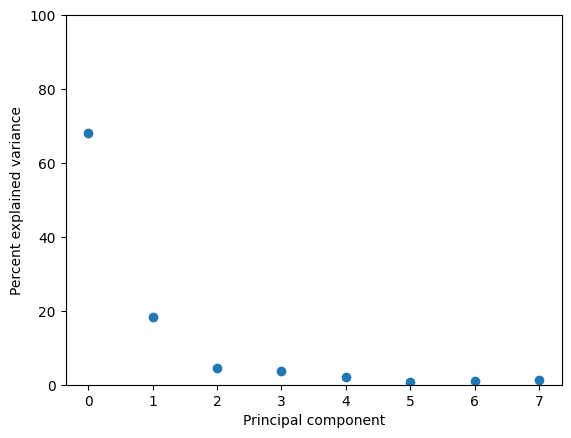

68.20551508749648 18.346785117832155 SUM = 86.55230020532863


In [29]:
import numpy as np
from sklearn import decomposition

# Load the car data
car_data = np.loadtxt("data-exam/car_data.txt", comments="%")

std = np.std(car_data, axis=0)
normalized_data = car_data / std
mn = np.mean(normalized_data, axis=0)

centered_data = normalized_data - mn
print(centered_data[0][0])


c_x = 1 / (203 - 1) * centered_data.T @ centered_data 

values, vectors = np.linalg.eig(c_x)
v_norm = values / values.sum() * 100
plt.plot(v_norm, 'o')
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()

print(v_norm[0], v_norm[1], f"SUM = {(v_norm[0] + v_norm[1])}")

<Figure size 640x480 with 0 Axes>

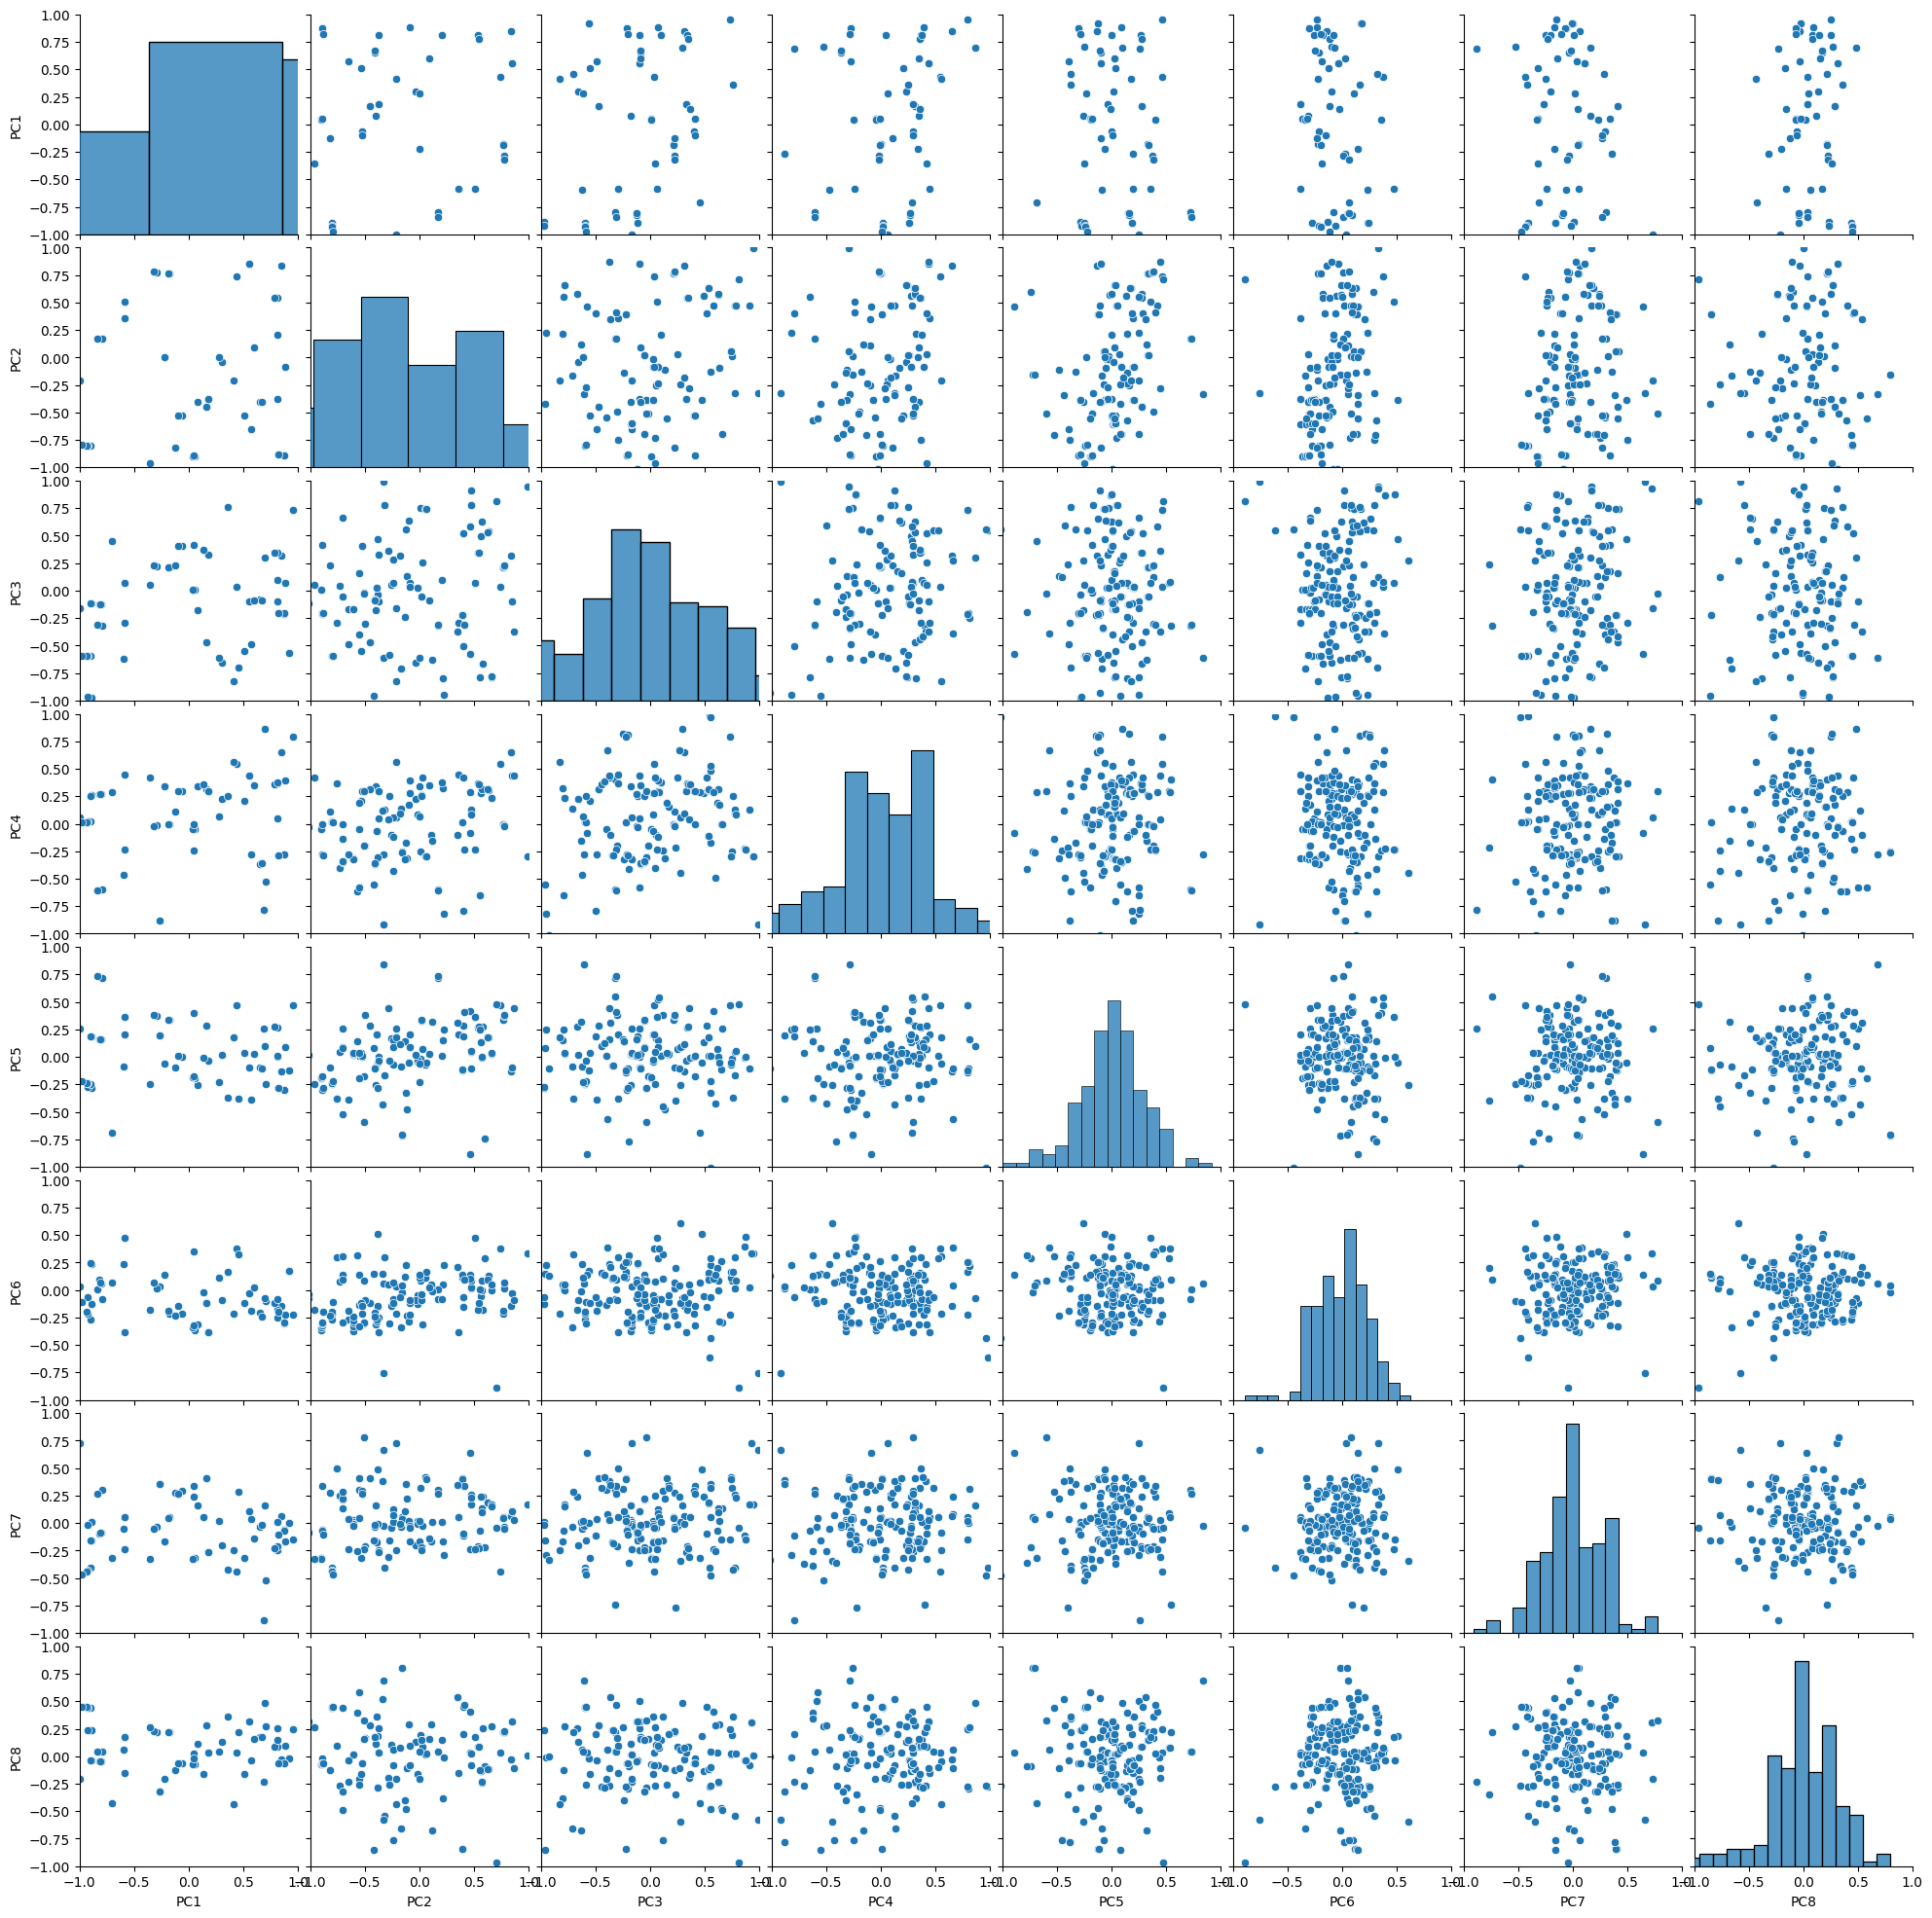

In [30]:
pc_proj = vectors.T.dot(centered_data.T)
plt.figure() 
d = pd.DataFrame(pc_proj.T, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
plot = sns.pairplot(d)
plot.set(xlim = (-1, 1), ylim = (-1, 1))
plt.show()

In [31]:
first_coordinate = pc_proj[0, 0]

absolute_value = np.abs(first_coordinate)

print(absolute_value, pc_proj[0, 0])

1.1282393391042802 1.1282393391042802


<Figure size 640x480 with 0 Axes>

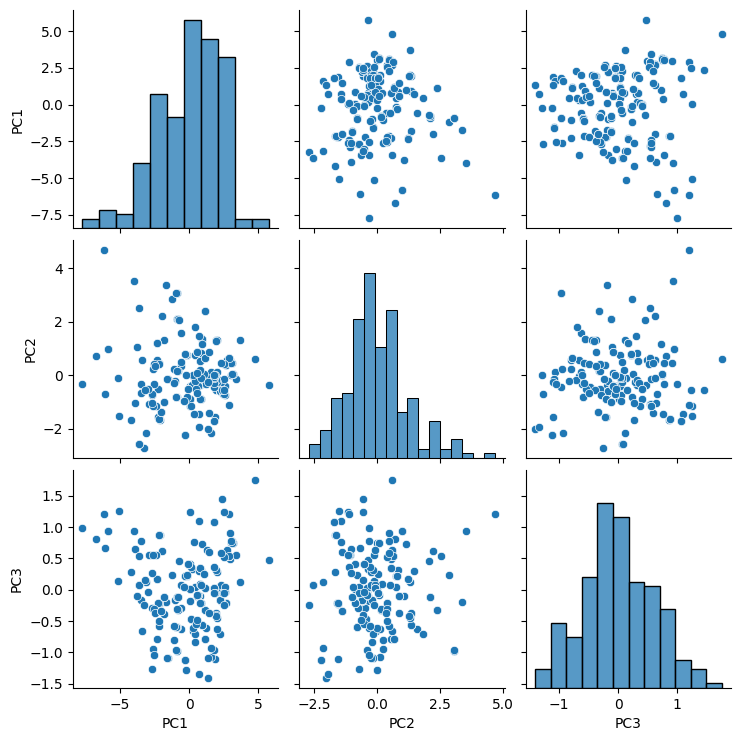

In [32]:
pc_proj_limited = pc_proj[0:3, :]
plt.figure() 
d = pd.DataFrame(pc_proj_limited.T, columns=['PC1', 'PC2', 'PC3'])
plot = sns.pairplot(d)
plt.show()

Landmark alignment error F: 67021


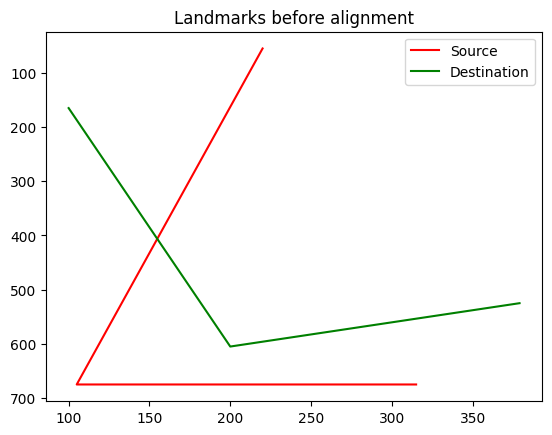

Landmark alignment error F: 21119.638667058498


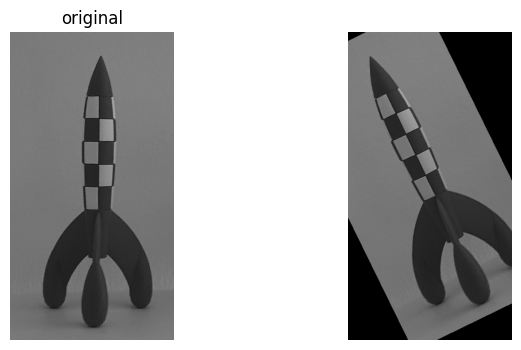

[129 129 129]


In [33]:
src_img = io.imread(in_dir + "rocket.png")


src = np.array([[220, 55], [105, 675], [315, 675]])
dst = np.array([[100, 165], [200, 605], [379, 525]])

e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")


warped = warp(src_img, tform.inverse)
plot_comparison(src_img, warped, "")

byte_warped = img_as_ubyte(warped)

print(byte_warped[150][150])

In [34]:
# Answer pixel at 150, 150 is 129
# Answer error before is 67021
# Answer error after is 21120

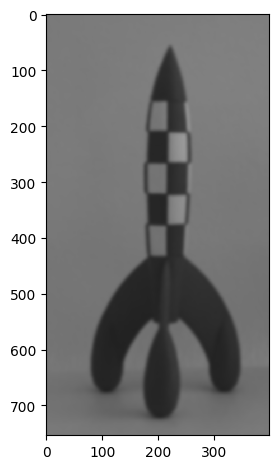

[123 123 123]


In [38]:
sigma = 3
gauss_img = gaussian(src_img, sigma)
gauss_byte = img_as_ubyte(gauss_img)

io.imshow(gauss_byte)
io.show()
print(gauss_byte[100][100])

In [39]:
# Answer is 123

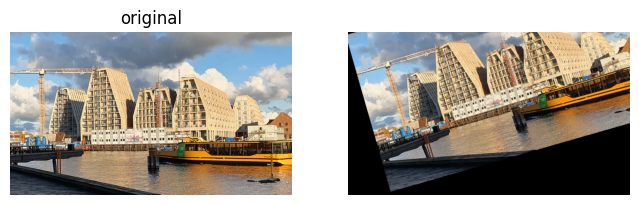

[88 91 95]


In [40]:
sun_img = io.imread(in_dir + "CPHSun.png")

rotated_img = rotate(sun_img, 16, center=[20,20])

plot_comparison(sun_img, rotated_img, "")

byte_im = img_as_ubyte(rotated_img)
print(byte_im[200][200])

In [41]:
# Answer is [88 91 95]

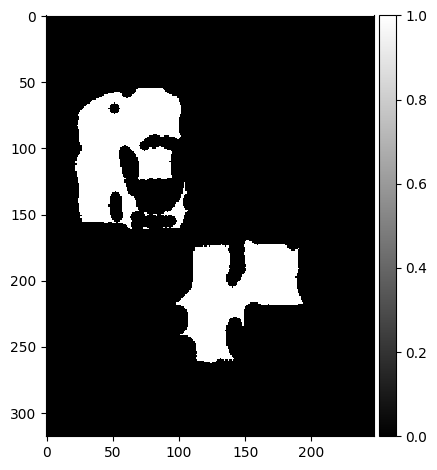

10045


In [43]:
input_img = io.imread(in_dir + "pixelwise.png")
hsv_img = color.rgb2hsv(input_img)

saturation_img = hsv_img[:, :, 1]

thres = threshold_otsu(saturation_img)
bin_img = (saturation_img > thres) *1

footprint = disk(4)
eroted = erosion(bin_img, footprint)

io.imshow(eroted, cmap="gray")
io.show()

# thres_im = img_as_ubyte(thres)
print(np.sum(eroted))


In [44]:
# Answer is between 9000 and 11000

In [45]:
transfer_speed_bytes = 30 * 1024 * 1024
image_size_bytes = 1024 * 768 * 3
max_images_transfer = transfer_speed_bytes // image_size_bytes
max_images_processed = 1 / (54 / 1000)
max_images = min(max_images_transfer, max_images_processed)

print("Maximum number of images: ", max_images)


Maximum number of images:  13


In [46]:
import skimage.io as io
from skimage import color
import numpy as np

# Load the images
change1 = io.imread("data-exam/change1.png")
change2 = io.imread("data-exam/change2.png")

# Convert images to grayscale
gray1 = color.rgb2gray(change1)
gray2 = color.rgb2gray(change2)

# Compute the absolute difference image
diff_image = np.abs(gray1 - gray2)

# Define the threshold for change detection
threshold = 0.3

# Count the number of changed pixels
changed_pixels = np.count_nonzero(diff_image > threshold)

# Calculate the total number of pixels in the image
total_pixels = diff_image.size

# Compute the percentage of changed pixels
percentage_changed = (changed_pixels / total_pixels) * 100

print(f"Percentage of changed pixels: {percentage_changed}%")


Percentage of changed pixels: 4.560539752005835%


In [47]:
# Answer is 5%